# BOTS 
## Yan Yan 

## PubMed

In [0]:
# Set the PubMed api key as environmental variable 
import os 
os.environ['NCBI_API_KEY'] = '86dfb48fed914a40e340d1c57134034c9108'

In [11]:
import time 
from time import sleep
import resource

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import seaborn as sns

!pip install biopython 
from Bio import Entrez
Entrez.email = "yan.yan.yy5@contractors.roche.com"

!pip install metapub
import metapub as pm
fetch = pm.PubMedFetcher()

!pip install git+git://github.com/titipata/pubmed_parser.git
import pubmed_parser

  Cloning git://github.com/titipata/pubmed_parser.git to /tmp/pip-req-build-wf90m0n7
  Running command git clone -q git://github.com/titipata/pubmed_parser.git /tmp/pip-req-build-wf90m0n7
  Created wheel for pubmed-parser: filename=pubmed_parser-0.2.2-cp36-none-any.whl size=18163 sha256=0b5654dc9aab2dbd9a7541cba799f5edeb4d5a2714c170ff03d39e394949f848
  Stored in directory: /tmp/pip-ephem-wheel-cache-ps_60xph/wheels/f5/4c/84/40073501015d7126a260f0cdae4ebae8a37e8e480ee36ff9ce
Successfully built pubmed-parser


In [0]:
# Time & Memory calculation START 
time_start = time.perf_counter()
# insert code here ...
#time_elapsed = (time.perf_counter() - time_start)
#memMb=resource.getrusage(resource.RUSAGE_SELF).ru_maxrss/1024.0/1024.0
#print ("%5.1f secs %5.1f MByte" % (time_elapsed,memMb))

0.0 secs 218.2 MByte


In [0]:
# Function to scrap pmids from Pudmed based on individuals' name 
def get_pmids(name_list):
    name_pmid = {}
    for name in name_list:
      pmid = fetch.pmids_for_query(name+'[au]')
      if pmid != []: # Function won't stroed the name with no pmid associated 
        name_pmid[name] = pmid # Can add other properties after 
      sleep(.35)
    return name_pmid

In [0]:
# Possible way to filter unrelevent results 
Test = ['Rakesh Joshi','Rakesh Joshi, Western'] # Adding one more feature describing the individual gives a filtered reuslt 
pmids = get_pmids(Test)
print(pmids)
print("The number of record searching 'Rakesh Joshi' is {}".format (len(pmids['Rakesh Joshi'])))
print("The number of record searching 'Rakesh Joshi, Western' is {}".format (len(pmids['Rakesh Joshi, Western'])))

{'Rakesh Joshi': ['32329408', '32313805', '32225631', '32181550', '31873380', '31806702', '31594465', '31361022', '31358189', '31077794', '31038412', '30657252', '30457142', '30431205', '30345081', '30316316', '30052167', '30023541', '29880902', '29752722', '29684526', '29516095', '29486250', '29412176', '29307090', '29126020', '28878498', '28451296', '27941954', '27109704', '27519164', '27074628', '28930116', '26739611', '26615882', '26375725', '26210259', '26159435', '26023493', '25990982', '25839136', '25829670', '25269396', '25159848', '25141174', '24559910', '24557906', '24550280', '26023464', '26023459', '23891708', '23862445', '23519100', '23261428', '23256852', '23134684', '23118466', '22873702', '21029741', '20521554', '20388979', '19181254', '20596429', '21825812', '18283803', '18262128', '21217915', '15524602'], 'Rakesh Joshi, Western': []}
The number of record searching 'Rakesh Joshi' is 68
The number of record searching 'Rakesh Joshi, Western' is 0


In [0]:
# Scarp the key words for a certain article based on pmid 
keywords = pubmed_parser.parse_xml_web('30431205', sleep=0.35)['keywords'] 
topics = keywords.split(sep=';')
topics 

['D006367:HeLa Cells',
 'D006801:Humans',
 'D013058:Mass Spectrometry',
 'D010750:Phosphoproteins',
 'D019000:Phosphotyrosine',
 'D015202:Protein Engineering',
 'D017433:Protein Structure, Secondary',
 'D020543:Proteome',
 'D018909:src Homology Domains']

In [0]:
# get individuals' research topics (i.e. find all keywords of a individual) stored in a separate dict 
def get_research_topics(pmids): #use the result from get_pmid
    name_topic = {}
    for name in pmids:
        topic_list = []
        for pmid in pmids[name]:
            # Scarp the key words for a certain article based on pmid 
            keywords = pubmed_parser.parse_xml_web(pmid, sleep=0.35)['keywords']  
            topics = keywords.split(sep=';')
            for topic in topics:
                if topic not in topic_list:
                     topic_list.append(topic)
        if topic_list != []:
          name_topic[name] = topic_list 
    #print(topic_list)
    #pmids[name].append(topic_list)
    #pmids[name] = tuple(pmids[name])
    return name_topic  

#Mesh was used as priority, can go into the library and change that part of the coded if needed 

In [0]:
# test for the function
get_research_topics(pmids)

{'Rakesh Joshi': ['COVID-19',
  'Coronavirus',
  'MPro',
  'Multi-target-directed ligand',
  'Protease inhibitor',
  'RdRp',
  'SARS-CoV-2 virus',
  'hACE-2',
  'graphene',
  'graphene/polymer composites',
  'protective clothing',
  'textiles',
  '',
  'diffusion',
  'molecular sieving',
  'selectivity',
  'C2 domain',
  'Ras homolog gene family, member A (RhoA)',
  'RhoGAP',
  'SAM domain',
  'breast cancer',
  'cell migration',
  'cell proliferation',
  'deleted in liver cancer 1 (DLC1)',
  'PD-1',
  'T-cell exhaustion',
  'immunotherapy',
  'mir-149-3p',
  'D001665:Binding Sites',
  'D002853:Chromatography, Liquid',
  'D005419:Flavonoids',
  'D005960:Glucosides',
  'D005964:Glucosyltransferases',
  'D013058:Mass Spectrometry',
  'D008958:Models, Molecular',
  'D015394:Molecular Structure',
  'D016297:Mutagenesis, Site-Directed',
  'D015202:Protein Engineering',
  'D013379:Substrate Specificity',
  'D027843:Vitis',
  'D000818:Animals',
  'D001522:Behavior, Animal',
  'D054884:Host-Pa

In [0]:
# Search for NCT number in Pubmed for individual 
name = 'Yujuan Zhang'
pmid_nct = fetch.pmids_for_query('{}[au] AND clinicaltrials.gov[si]'.format(name))
pmid_nct # Get the pmids that associated with a NCT number 

['32010057', '31080494']

In [0]:
def nct_from_abstract(pmid):
    handle = Entrez.efetch(db="pubmed", id=pmid, rettype="abstract", retmode="text") # Read the abstract
    abstract = handle.read()
    nct_i = abstract.find("NCT")
    NCTnum = abstract[nct_i:nct_i+11]
    return NCTnum

In [0]:
# test for the function 
nct_from_abstract('32010057')

'NCT02515903'

In [0]:
# Convert the NCT number in to a dict
def get_nct_list(name_list):
    name_nct = {}
    # The function won't store the name if it is not associated with a nct 
    for name in name_list:
        pmid_nct = fetch.pmids_for_query('{}[au] AND clinicaltrials.gov[si]'.format(name))
        if pmid_nct != []:
            nct_list = []
            for pmid in pmid_nct:
                nctnum = nct_from_abstract(pmid)
                if nctnum not in nct_list:
                    nct_list.append(nctnum)
            name_nct[name] = nct_list 
    return name_nct 

In [0]:
# test for the function 
get_nct_list(['Yujuan Zhang'])

{'Yujuan Zhang': ['NCT02515903']}

## ClinicalTrials

Can search NCT number in PubMed to locate the article, linkage 

To retrieve all records in PubMed that list trial registration in ClinicalTrials.gov, search: **"clinicaltrials.gov [si]"**

In [0]:
import urllib, requests 
import json

In [0]:
def decode_url(url):
    f = urllib.request.urlopen(url)
    raw_data = f.read()
    raw_data = raw_data.decode("utf-8")
    return raw_data

In [0]:
def extract_nct(raw):
    nct_num = []
    url_dict = json.loads(raw)
    nct_dict = url_dict['StudyFieldsResponse']['StudyFields']
    for i in range(len(nct_dict)):
        nct_num.append(nct_dict[i]['NCTId'][0])
    return nct_num

In [0]:
def get_NCTId(name_list):
    name_NCTId = {}
    for name in name_list:
        name1 = name.replace(' ', '+')
        url = 'https://clinicaltrials.gov/api/query/study_fields?expr={}+&fields=NCTId&min_rnk=1&max_rnk=&fmt=json'.format(name1)
        result = decode_url(url)
        NCTId = extract_nct(result)
        name_NCTId[name] = NCTId
        sleep(.35)
    return name_NCTId

In [0]:
NCTId = get_NCTId(['Rakesh Joshi'])
NCTId

{'Rakesh Joshi': ['NCT04086745', 'NCT02635438']}

## Sample Result Visulization 

In [0]:
Test_Names = ['Rakesh Joshi', 'Hjalmar Turesson', 'Yu Shrike Zhang', 'Yujuan Zhang']
pmids = get_pmids(Test_Names)

In [0]:
#Build a Matrix for co-authorship 
def get_matrix(info_dict): # Use the result from get_pmids 
    con_matrix = np.zeros((len(info_dict), len(info_dict)), dtype=int)
    for i, name1 in enumerate(info_dict):
        for j, name2 in enumerate(info_dict):
            con_matrix[i, j] = len(set(info_dict[name1]).intersection(set(info_dict[name2]))) 
    return con_matrix 

In [0]:
# Test for the function 
coauther_matrix=get_matrix(pmids)

In [75]:
coauther = pd.DataFrame(data=coauther_matrix, index=Test_Names, columns=Test_Names)
coauther

,Rakesh Joshi,Hjalmar Turesson,Yu Shrike Zhang,Yujuan Zhang
Rakesh Joshi,68,0,1,5
Hjalmar Turesson,0,8,0,0
Yu Shrike Zhang,1,0,134,1
Yujuan Zhang,5,0,1,117


In [76]:
np.fill_diagonal(coauther.values, 0)
coauther

,Rakesh Joshi,Hjalmar Turesson,Yu Shrike Zhang,Yujuan Zhang
Rakesh Joshi,0,0,1,5
Hjalmar Turesson,0,0,0,0
Yu Shrike Zhang,1,0,0,1
Yujuan Zhang,5,0,1,0


In [77]:
mask = np.zeros_like(coauther, dtype=np.int)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(coauther, mask=mask, annot=True, fmt="d", cmap="YlGnBu")

TypeError: ignored

In [0]:
# Organized into a function 
def matrix_map(info_dict, info='',n=''):
  # info represents the info type (i.e. pmid, nctid,...)
  # n represents the sample size for later datafram and graph naming purpose, default is 0 
  # Get the matrix for the information 
  matrix = get_matrix(info_dict)
  # Organize into a dataframe 
  info_df = pd.DataFrame(data=matrix, index=info_dict.keys(), columns=info_dict.keys())
  # Full the diagnoal that represent individuals' own work with 0 
  np.fill_diagonal(info_df.values, 0)
  # Drop the all zero rows and columns 
  info_df = info_df.loc[:, (info_df != 0).any(axis=0)]
  info_df = info_df[(info_df.select_dtypes(include=['number']) != 0).any(1)]
  # Export the dict to a csv file 
  info_df.to_csv('{} connection matrix{}.csv'.format(info, n))
  # print(info_df)
  # Mask the lower trangle in the heatmap(won't work at colab)
  # mask = np.zeros_like(info_df, dtype=np.int)
  # mask[np.triu_indices_from(mask)] = True
  # sns.heatmap(info_df, mask=mask, annot=True, fmt="d", cmap="YlGnBu")
  fig, ax = plt.subplots(figsize=(100,100))  
  sns.heatmap(info_df, annot=True, fmt="d", cmap="YlGnBu")
  # fortmat the graph 
  plt.title('{} connection heatmap{}'.format(info, n), fontsize = 20) # title with fontsize 20
  plt.xlabel('Individual Full Name', fontsize = 10) # x-axis label with fontsize 15
  plt.ylabel('Individual Full Name', fontsize = 10) # y-axis label with fontsize 15
  # Save the heatmap 
  plt.savefig('{} connection heatmap{}.png'.format(info, n))
  return info_df

,Rakesh Joshi,Yu Shrike Zhang,Yujuan Zhang
Rakesh Joshi,0,1,5
Yu Shrike Zhang,1,0,1
Yujuan Zhang,5,1,0


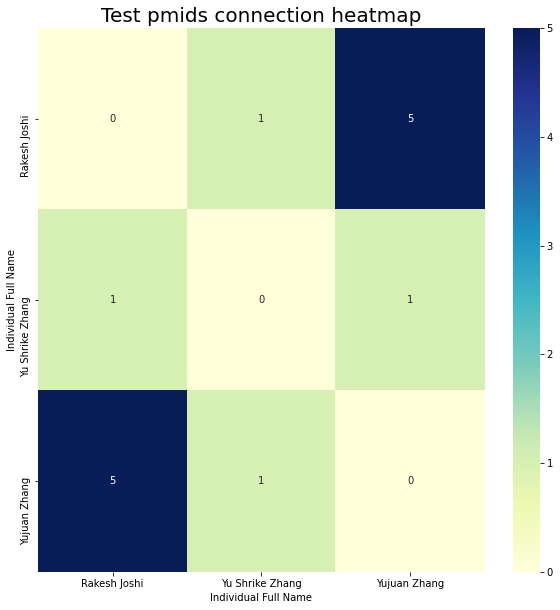

In [21]:
# Test for the function 
matrix_map(pmids, 'Test pmids')